In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.append('../')
from frenet import cartesian_to_frenet
from plot_utils import plot_centerline, plot_track, plot_projection

(14,) (14,) (10, 3)


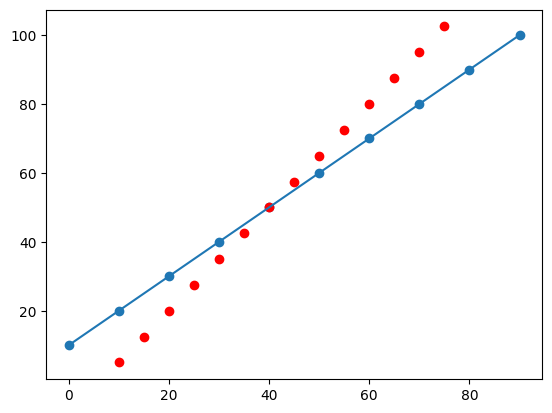

In [13]:
# Generate a reference path with 3-dimensions
ref_path_x = np.arange(0, 100, 10)
ref_path_y = ref_path_x  + 10

# # We don't provide the projection for z-axis in the current version.
# # As part of the data in Argoverse dataset contains the z-axis information, we synthesize it here. 
ref_path_z = np.zeros_like(ref_path_x)  
ref_path = np.stack([ref_path_x, ref_path_y, ref_path_z], axis=1)

# Generate a track with 2-dimensions
track_x = np.arange(10, 80, 5, dtype=np.float32)
track_y = track_x * 1.5 - 10

print(track_x.shape, track_y.shape, ref_path.shape)

# Visualize the reference path and the track
plot_centerline(ref_path.reshape(1, -1, 3))

plot_track(track_x, track_y, color='red')

(14,) (14,) (14,) (14, 2)


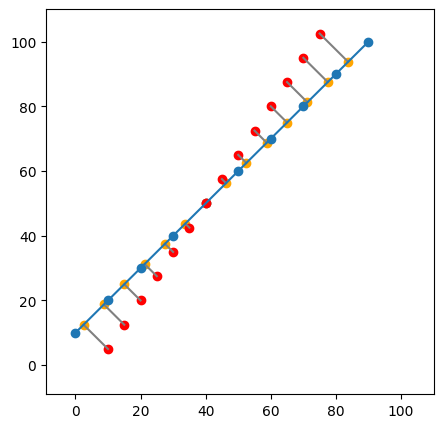

Red: track, Blue: centerline, Yellow: projection


In [18]:
# Although the projection is a middle variable, we still return it for visualization.
s, d, direction, projection = cartesian_to_frenet(track_x, track_y, ref_path)
print(s.shape, d.shape, direction.shape, projection.shape)

# visualize the projection
fig = plt.figure(figsize=(5, 5))

plot_projection(projection, xl=track_x, yl=track_y, connection=True)

plot_centerline(ref_path.reshape(1, -1, 3))
plot_track(track_x, track_y, color='red')

plt.xlim(-9, 110)
plt.ylim(-9, 110)

plt.show()
print('Red: track, Blue: centerline, Yellow: projection')